# Exercise 5: Observation model


## 5.1 Implement model for perceiving landmarks

Consider a robot that operates in an environment populated by **range-only** sensors such as _beacons_.
These sensors transmit a signal that allows for obtaining noisy measurements of their distance from a receiver mounted on the robot.

The function `landmark_observation_model` realizes the observation model for perceiving landmarks with a range sensor. It takes as input:
 
- the observed noisy range $z$
- the standard deviation of the measurement $\sigma_z$ (zero-mean Gaussian noise)
- the position of the robot in the map $x$
- the position of the transmitting beacon in the map $b$

The output of this function is the probability $p(z | x, m)$ that the measurement $z$ was obtained at position $x$.

Implement the `landmark_observation_model` function and verify that it is correct for some test input. **[2.0]**

In [1]:
from ex5 import *
z = 4
sigma_r = 1
b = [2.1, 1.7]
x = [3.2, 2.8]
poses = landmark_observation_model(z,x,b, sigma_r)
print(poses)

0.3167687523552094


---

## 5.2 Compute likelihood of measurement in the environment

The robot operates in an environment that is represetend by a 20x20 grid map and contains a beacon at position $b_1 = [0,0]$ (top-left corner). 

The robot obtains a range measurement of the beacon $z_1 = 10$ and the sensor noise is $\sigma_{z1} = 1$.

Compute the `landmark_observation_model` at each cell of the environment and plot the likelihood of the observation over the environment. **[1.0]** 

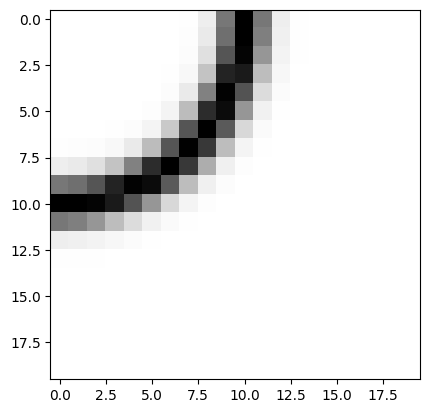

In [2]:
b1 =[0,0]
z1 =10
sigam1 = 1

gridmap = np.zeros((20,20))
for i in range(gridmap.shape[0]):
    for j in range(gridmap.shape[1]):
        gridmap[i,j] = landmark_observation_model(z1, [i,j], b1, sigam1)

plot_gridmap(gridmap)

---

## 5.3 Multiple landmarks

Assume that we install two **additional** beacons in our environment:

- $b_2 = [0, 10]$
- $b_3 = [10, 0]$

from which we obtain the following observations:

- $z_2 = 5$ with $\sigma_{z2} = 3$
- $z_3 = 9$ with $\sigma_{z3} = 2$

Compute the `landmark_observation_model` at each cell of the environment considering the measurements from **all** beacons and plot the **joint** likelihood of the observations over the environment. **[2.0]** 

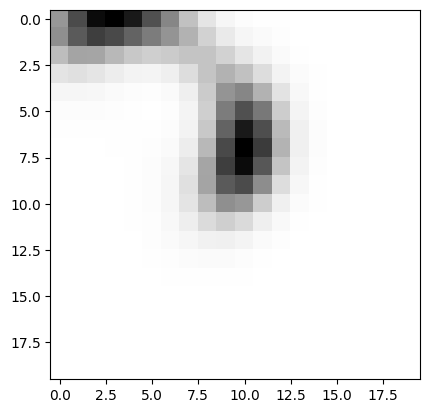

In [3]:
b1 = [5, 5] 
b2 = [0, 10]
b3 = [10, 0]
b = [b1, b2, b3] 

z1 = 7.0
z2 = 5.0
z3 = 9.0
z = [z1, z2, z3]


sigma1 = 2.0
sigma2 = 3.0
sigma3 = 2.0
sigma = [sigma1, sigma2, sigma3]


size = 20


gridmap = observation_likelihood(z, b, np.zeros((size, size)), sigma, size)
plot_gridmap(gridmap)
